In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re

from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import seaborn as sns
sns.set()
%matplotlib inline
import string

import os 
from datetime import datetime
import random
import math

from sklearn.cross_validation import train_test_split

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('train.csv')

# DataFrame的資料描述

In [3]:
A = df['Cabin'][0]
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))

A = np.nan
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))

A = None
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))


nan
False
True
False
nan
False
True
False
None
True
True
False


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


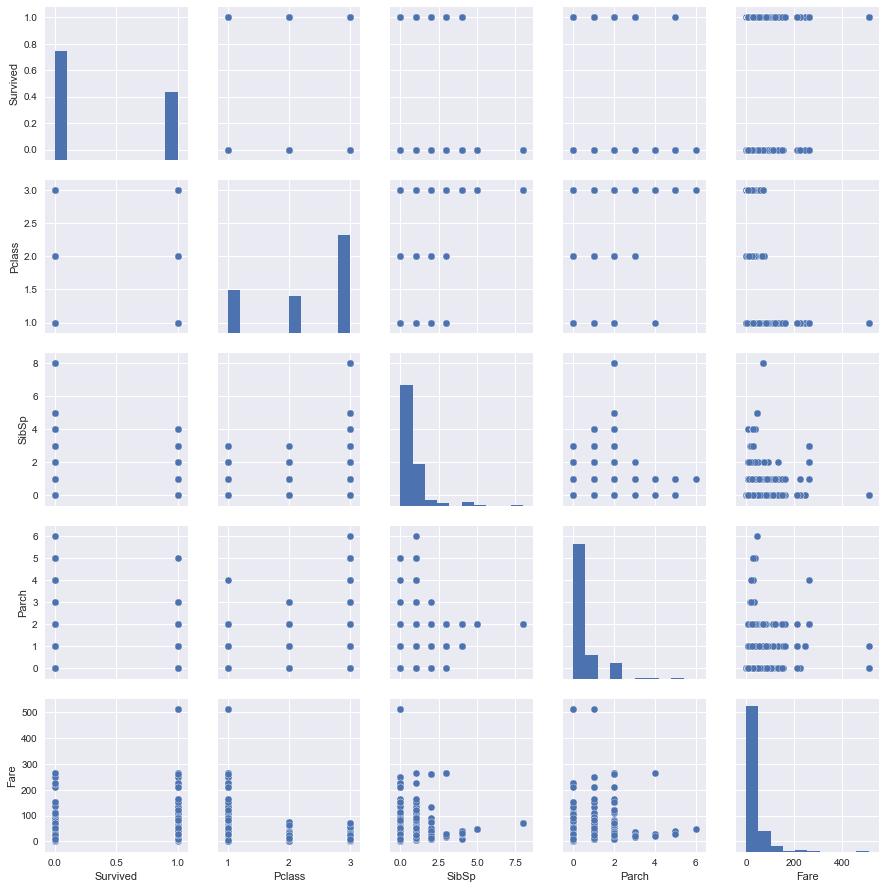

In [7]:
sns.pairplot(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']])

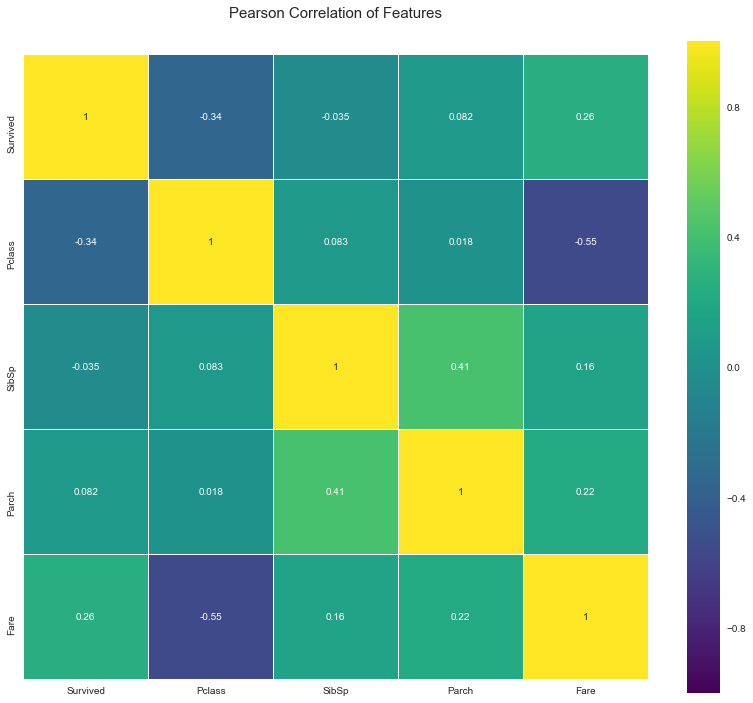

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
# C_Cabins = []
# for c in df['Cabin']:
#     print(type(c))
#     if c.startswith('B'):
#         C_Cabins.append(c)
# C_Cabins

In [10]:
C_Cabins = []
for c in df['Cabin']:
#     if type(c) != float and c.startswith('B'):
    if pd.notnull(c) and c.startswith('B'):
        C_Cabins.append(c)
C_Cabins

['B78',
 'B30',
 'B28',
 'B58 B60',
 'B86',
 'B19',
 'B4',
 'B80',
 'B77',
 'B94',
 'B49',
 'B58 B60',
 'B57 B59 B63 B66',
 'B18',
 'B35',
 'B96 B98',
 'B96 B98',
 'B49',
 'B37',
 'B79',
 'B73',
 'B18',
 'B38',
 'B39',
 'B22',
 'B41',
 'B50',
 'B35',
 'B71',
 'B51 B53 B55',
 'B5',
 'B20',
 'B5',
 'B101',
 'B57 B59 B63 B66',
 'B22',
 'B77',
 'B96 B98',
 'B3',
 'B20',
 'B82 B84',
 'B96 B98',
 'B102',
 'B69',
 'B28',
 'B51 B53 B55',
 'B42']

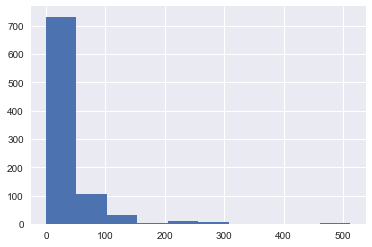

In [11]:
plt.hist(df['Fare'])
plt.show()

# DataFrame的屬性

In [12]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
print(len(df))
print(df.columns)
print(df.index)

891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)


# DataFrame的索引

In [14]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [15]:
df['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [16]:
df.loc[[2,5,7]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [17]:
df[['Fare', 'Sex']]

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female
3,53.1000,female
4,8.0500,male
5,8.4583,male
6,51.8625,male
7,21.0750,male
8,11.1333,female
9,30.0708,female


In [18]:
df.loc[0, 'Fare']

7.25

In [19]:
df.loc[[0,1,2], 'Fare']

0     7.2500
1    71.2833
2     7.9250
Name: Fare, dtype: float64

In [20]:
df.loc[range(3), ['Fare','Cabin']]

,Fare,Cabin
0,7.2500,NaN
1,71.2833,C85
2,7.9250,NaN


In [21]:
df.loc[pd.isnull(df['Cabin'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [22]:
df.loc[df['Sex']=='male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [23]:
df.loc[df['Age']> 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [24]:
indexing_bool_list = np.random.randint(0,2,size=len(df)) == 1 #我們首先先創造出一個，隨機的、只有True跟False的、與df等長的list
print(indexing_bool_list[:30]) #看一下它前30個長什麼樣
df.loc[indexing_bool_list]  #然後我們看看DataFrame會如何反應

[ True False  True False False False  True False  True  True False  True
 False False False False  True False  True  True False  True False False
  True  True False False False False]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S


In [25]:
print(len(pd.isnull(df['Cabin'])), Counter(pd.isnull(df['Cabin'])))
print(len(df['Sex']=='male'), Counter(df['Sex']=='male'))
print(len(df['Age']> 70), Counter(df['Age']> 70))

891 Counter({True: 687, False: 204})
891 Counter({True: 577, False: 314})
891 Counter({False: 886, True: 5})


# DataFrame的更新

In [26]:
columns = df.columns
df.columns = range(len(df.columns))
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
df.columns = columns
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [28]:
df.loc[df['Sex']=='male', 'Sex'] = 1
df.loc[df['Sex']=='female', 'Sex'] = 0
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [29]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
std = df['Age'].std()
mean = df['Age'].mean()
size = len(df[pd.isnull(df['Age'])])
age_null_random_list = np.random.randint(mean - std, mean + std, size=size)
df.loc[pd.isnull(df['Age']), 'Age'] = age_null_random_list
df['Age'].describe()

count    891.000000
mean      29.498507
std       13.557833
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# 新增資料

In [31]:
num_NonSurvived = df.groupby('Survived').count()['PassengerId'][0]  # 死亡者的個數
num_Survived = df.groupby('Survived').count()['PassengerId'][1]  # 生還者的個數
duplicate_length = num_NonSurvived - num_Survived
print(num_NonSurvived)
print(num_Survived)
print(duplicate_length)

549
342
207


In [32]:
duplicate_indices = np.random.choice(df[df['Survived'] == 1].index, duplicate_length)  #choice可以直接幫你從一個list中，隨機挑選出指定size的item。這便則可以挑選出，特定size的index值。
df_duplicate = df.loc[duplicate_indices].copy()  # 索引出隨機挑選的index的row
print(len(df))
df = pd.concat([df, df_duplicate], ignore_index=True)  # 把挑選出來要負的的row，新增上原本的DataFrame
print(len(df))
df

891
1098


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [33]:
df['Name_Length'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
def cal_namelength(row):
    if pd.notnull(row['Name']):
        row['Name_Length'] = len(row['Name'])
    else:
        row['Name_Length'] = 0
    return row
df = df.apply(cal_namelength, axis=1)  # 記得: 1.要把新的df指派給原本的df才會成功更新。 2. axis要設定為1，才會以row為單位跑回圈。
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,24
5,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q,16
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,23
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,30
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,49
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,35


In [34]:
df['Age_cat'] = 0
for idx, row in df.iterrows():  # 請務必記得加上idx，不然跑回圈的item會變成(idx, row)
    Age = row['Age']
    if Age < 20.315:
        Age_cat = 0
    elif Age < 40.21:
        Age_cat = 1
    elif Age < 60.1049:
        Age_cat = 2
    else:
        Age_cat = 3
    df.loc[idx, 'Age_cat'] = Age_cat
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,51,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,44,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,24,1
5,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q,16,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,23,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,30,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,49,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,35,0


# 刪除資料

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,51,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,44,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,24,1
5,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q,16,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,23,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,30,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,49,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,35,0


In [36]:
df.drop(['Age_cat', 'Name_Length'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [37]:
df_line0 = df.loc[:2].copy()
print(len(df))
df.drop(range(3), inplace=True)
print(len(df))
df = pd.concat([df, df_line0], ignore_index=True)
print(len(df))

1098
1095
1098


# groupby

In [38]:
df['Age_cat'] = 0
for idx, row in df.iterrows():  # 請務必記得加上idx，不然跑回圈的item會變成(idx, row)
    Age = row['Age']
    if Age < 20.315:
        Age_cat = 0
    elif Age < 40.21:
        Age_cat = 1
    elif Age < 60.1049:
        Age_cat = 2
    else:
        Age_cat = 3
    df.loc[idx, 'Age_cat'] = Age_cat
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
1,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1
2,6,0,3,"Moran, Mr. James",1,16.0,0,0,330877,8.4583,NaN,Q,0
3,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,2
4,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0
5,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,1
6,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0
7,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,0
8,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,2
9,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,NaN,S,0


In [39]:
df.groupby('Age_cat').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age_cat,,,,,,,,,,,,
0,275,275,275,275,275,275,275,275,275,275,44,275
1,606,606,606,606,606,606,606,606,606,606,140,605
2,193,193,193,193,193,193,193,193,193,193,87,193
3,24,24,24,24,24,24,24,24,24,24,11,23


In [40]:
df.groupby('Age_cat').mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age_cat,,,,,,,,
0,432.661818,0.545455,2.556364,0.534545,13.208182,0.810909,0.654545,27.501486
1,446.201320,0.478548,2.283828,0.603960,29.613036,0.414191,0.313531,34.064058
2,460.616580,0.528497,1.782383,0.549223,48.225389,0.414508,0.336788,44.825521
3,436.833333,0.291667,1.708333,0.791667,65.770833,0.125000,0.250000,38.722571


In [41]:
df.groupby('Age_cat').std()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age_cat,,,,,,,,
0,264.279930,0.498837,0.704201,0.499715,6.421638,1.267458,0.792717,38.466898
1,256.144211,0.499952,0.830395,0.489477,5.545679,0.968118,0.763235,56.779436
2,249.748223,0.500486,0.856532,0.498865,5.685071,0.786737,0.838863,47.001442
3,237.632099,0.464306,0.907896,0.414851,4.876695,0.337832,0.846990,53.110869


In [42]:
df.groupby('Age_cat').median()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age_cat,,,,,,,,
0,425,1,3,1,16.0,0,0,15.2458
1,445,0,3,1,29.0,0,0,13.0000
2,464,1,2,1,48.0,0,0,26.5500
3,484,0,1,1,64.0,0,0,26.5500


# sort_values

In [43]:
df.sort_values('Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
627,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.00,0,0,27042,30.0000,A23,S,3
848,852,0,3,"Svensson, Mr. Johan",1,74.00,0,0,347060,7.7750,NaN,S,3
490,494,0,1,"Artagaveytia, Mr. Ramon",1,71.00,0,0,PC 17609,49.5042,NaN,C,3
93,97,0,1,"Goldschmidt, Mr. George B",1,71.00,0,0,PC 17754,34.6542,A5,C,3
113,117,0,3,"Connors, Mr. Patrick",1,70.50,0,0,370369,7.7500,NaN,Q,3
669,673,0,2,"Mitchell, Mr. Henry Michael",1,70.00,0,0,C.A. 24580,10.5000,NaN,S,3
742,746,0,1,"Crosby, Capt. Edward Gifford",1,70.00,1,1,WE/P 5735,71.0000,B22,S,3
30,34,0,2,"Wheadon, Mr. Edward H",1,66.00,0,0,C.A. 24579,10.5000,NaN,S,3
453,457,0,1,"Millet, Mr. Francis Davis",1,65.00,0,0,13509,26.5500,E38,S,3
277,281,0,3,"Duane, Mr. Frank",1,65.00,0,0,336439,7.7500,NaN,Q,3


# Special task

In [44]:
from string import punctuation
from collections import Counter
df_name = df[['Name']]
def processname(name):
    if type(name) == str:
        for pun in punctuation:
            name = name.replace(pun, " ")
        terms = [term for term in name.split() if term != " "]
        return terms
    else:
        return []
df_name['processed'] = df['Name'].apply(processname)
df_name

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,processed
0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","[Futrelle, Mrs, Jacques, Heath, Lily, May, Peel]"
1,"Allen, Mr. William Henry","[Allen, Mr, William, Henry]"
2,"Moran, Mr. James","[Moran, Mr, James]"
3,"McCarthy, Mr. Timothy J","[McCarthy, Mr, Timothy, J]"
4,"Palsson, Master. Gosta Leonard","[Palsson, Master, Gosta, Leonard]"
5,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","[Johnson, Mrs, Oscar, W, Elisabeth, Vilhelmina..."
6,"Nasser, Mrs. Nicholas (Adele Achem)","[Nasser, Mrs, Nicholas, Adele, Achem]"
7,"Sandstrom, Miss. Marguerite Rut","[Sandstrom, Miss, Marguerite, Rut]"
8,"Bonnell, Miss. Elizabeth","[Bonnell, Miss, Elizabeth]"
9,"Saundercock, Mr. William Henry","[Saundercock, Mr, William, Henry]"


In [45]:
all_terms = []
for terms in df_name['processed']:
    all_terms.extend(terms)
sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)

[('Mr', 569),
 ('Miss', 264),
 ('Mrs', 189),
 ('William', 73),
 ('John', 52),
 ('Master', 52),
 ('Henry', 39),
 ('Elizabeth', 31),
 ('Mary', 29),
 ('Anna', 26),
 ('Charles', 26),
 ('Thomas', 26),
 ('James', 26),
 ('George', 25),
 ('Edward', 24),
 ('Joseph', 21),
 ('Frederick', 20),
 ('Margaret', 19),
 ('Arthur', 17),
 ('Richard', 16),
 ('Johan', 15),
 ('Samuel', 15),
 ('Alice', 14),
 ('Catherine', 14),
 ('Peter', 14),
 ('Alexander', 13),
 ('Jr', 12),
 ('Alfred', 12),
 ('Leonard', 11),
 ('Ernest', 11),
 ('Robert', 11),
 ('Maria', 11),
 ('Karl', 11),
 ('Helen', 11),
 ('Annie', 11),
 ('Brown', 10),
 ('Johnson', 10),
 ('Dr', 10),
 ('H', 10),
 ('Albert', 9),
 ('Richards', 9),
 ('Edith', 9),
 ('Andersson', 9),
 ('J', 9),
 ('Carter', 9),
 ('O', 9),
 ('Ada', 9),
 ('Frank', 9),
 ('Bertha', 9),
 ('Martin', 9),
 ('Jane', 9),
 ('Augusta', 8),
 ('Kate', 8),
 ('Victor', 8),
 ('Anne', 8),
 ('Marie', 8),
 ('E', 8),
 ('de', 8),
 ('Berk', 8),
 ('Hoyt', 7),
 ('Louise', 7),
 ('Madeleine', 7),
 ('Elias', 7

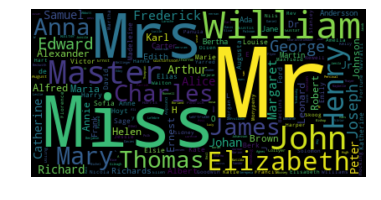

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()